# Test pyIAST for match with competitive Langmuir model

In the case that the pure-component isotherms $N_{i,pure}(P)$ follow the Langmuir model with the same saturation loading $M$:
    
$N_{i,pure} = M \frac{K_iP}{1+K_iP},$

The mixed gas adsorption isotherm follows the competitive Langmuir isotherm:

$N_i = M \frac{K_i p_i}{1 + \sum_j K_jp_j},$

where $p_i$ is the partial pressure of component $i$. Here, we generate synthetic pure-component adsorption isotherm data and confirm that pyIAST agrees with the competitive Langmuir isotherm for 3 components.    

In [11]:
import numpy as np
import pyiast
import pandas as pd
%matplotlib inline

## Generate synthetic pure-component isotherm data, fit Langmuir models to them.

Model parameters ($M$, $K_i$)

In [12]:
M = 10.0
langmuirKs = [1.0, 10.0, 20.0]  # K_i

Generate data according to Langmuir model, store in list of Pandas DataFrames

In [13]:
pressure = np.linspace(0, 15)
dfs = [pd.DataFrame({'P': pressure, 
                     'L': M * langmuirKs[i] * pressure / (
                1.0 + langmuirKs[i] * pressure)})
      for i in range(3)]

Use pyIAST to fit Lanmguir models to the data, then plot fits

Langmuir identified model parameters:
	K = 1.000011
	M = 9.999996
RMSE =  1.23558943329e-05


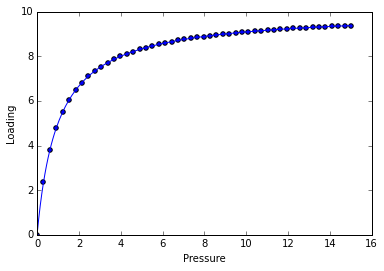

Langmuir identified model parameters:
	K = 9.999977
	M = 10.000000
RMSE =  1.24584383163e-06


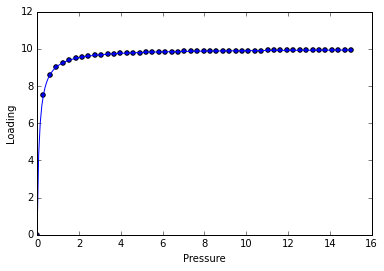

Langmuir identified model parameters:
	K = 19.999969
	M = 10.000000
RMSE =  3.12160151037e-07


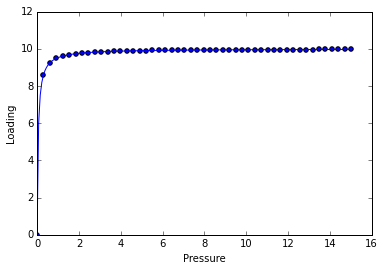

In [14]:
isotherms = [pyiast.ModelIsotherm(dfs[i], pressure_key='P', 
                                  loading_key='L', model='Langmuir') 
             for i in range(3)]

for i in range(len(isotherms)):
    isotherms[i].print_params()
    pyiast.plot_isotherm(isotherms[i])

## Compare pyIAST predicted component loadings to that of competitive Langmuir

In [15]:
partial_pressures = [0.2, 0.3, 0.4]
q = pyiast.iast(partial_pressures, isotherms)
for i in range(3):
    print "Component", i
    print "\tIAST loading:", q[i]
    print "\tCompetitive Langmuir loading:", M * langmuirKs[i] *\
    partial_pressures[i] / (1.0 + np.dot(langmuirKs, partial_pressures))

Component 0
	IAST loading: 0.163936304098
	Competitive Langmuir loading: 0.16393442623
Component 1
	IAST loading: 2.45901377231
	Competitive Langmuir loading: 2.45901639344
Component 2
	IAST loading: 6.55737663939
	Competitive Langmuir loading: 6.55737704918
